<a href="https://colab.research.google.com/github/yoojen/machine_learning/blob/main/Basic_OCR_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import easyocr
import PIL
from PIL import Image

In [9]:
print(f"EasyOCR version: {easyocr.__version__}")
print(f"Pillow version: {PIL.__version__}")

EasyOCR version: 1.7.2
Pillow version: 11.1.0


In [11]:
import os
from pathlib import Path


In [15]:
cwd = os.getcwd()
print(cwd )
os.listdir(cwd)

/content


['.config', 'sample_image.webp', 'sample_data']

In [19]:
image_path = cwd/Path('sample_image.webp')
image_path

PosixPath('/content/sample_image.webp')

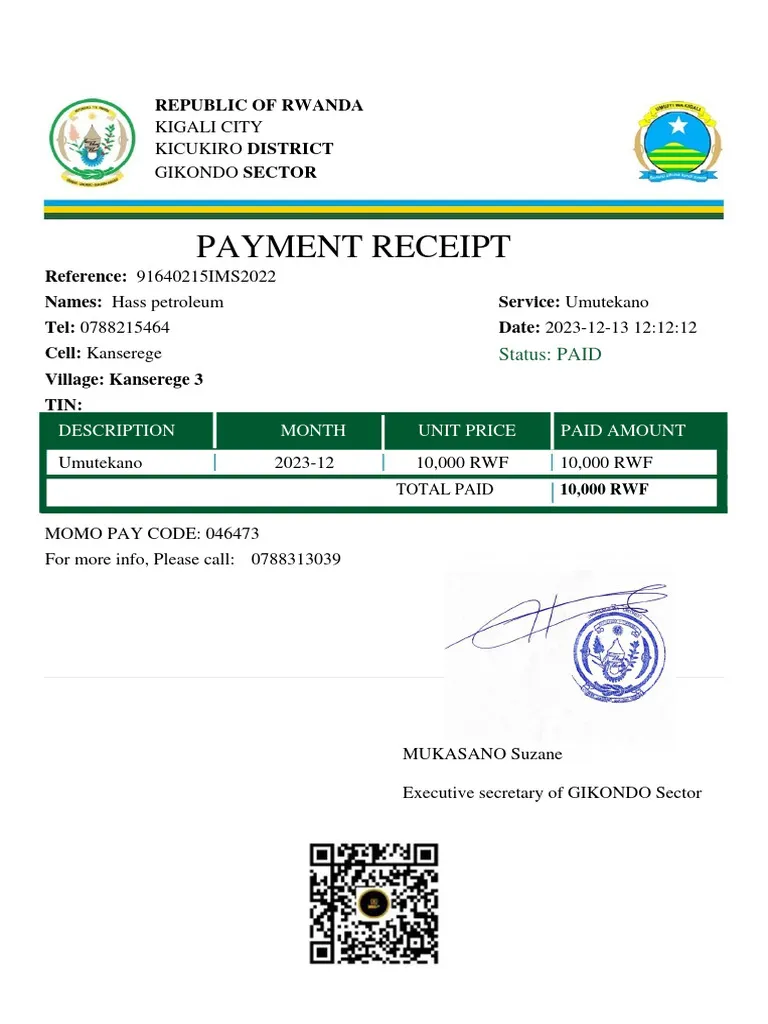

In [20]:
img = Image.open(image_path)
img

In [22]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [25]:
str(image_path)

'/content/sample_image.webp'

In [26]:
result = reader.readtext(str(image_path))
result

[([[153, 95], [365, 95], [365, 115], [153, 115]],
  'REPUBLIC OF RWANDA',
  0.9292988955661892),
 ([[153, 117], [265, 117], [265, 137], [153, 137]],
  'KIGALI CITY',
  0.9094886837147691),
 ([[153, 139], [337, 139], [337, 157], [153, 157]],
  'KICUKIRO DISTRICT',
  0.9364690143141425),
 ([[151, 163], [319, 163], [319, 181], [151, 181]],
  'GIKONDO SECTOR',
  0.9981844633635562),
 ([[192, 227], [517, 227], [517, 266], [192, 266]],
  'PAYMENT RECEIPT',
  0.671872660438587),
 ([[44, 265], [279, 265], [279, 285], [44, 285]],
  'Reference: 9164021SIMS2022',
  0.707867637003498),
 ([[45, 293], [105, 293], [105, 311], [45, 311]],
  'Names:',
  0.8993235068213843),
 ([[111, 293], [227, 293], [227, 313], [111, 313]],
  'Hass petroleum',
  0.9955345610396157),
 ([[497, 295], [651, 295], [651, 311], [497, 311]],
  'Service: Umutekano',
  0.9981200595563162),
 ([[45, 317], [173, 317], [173, 337], [45, 337]],
  'Tel: 0788215464',
  0.6605271571030208),
 ([[499, 317], [699, 317], [699, 337], [499, 3

In [29]:
len(result)

31

In [33]:
# Reading image as binary data
with open(image_path, "rb") as f:
  img = f.read()
result = reader.readtext(img, detail=0)
result

['REPUBLIC OF RWANDA',
 'KIGALI CITY',
 'KICUKIRO DISTRICT',
 'GIKONDO SECTOR',
 'PAYMENT RECEIPT',
 'Reference: 9164021SIMS2022',
 'Names:',
 'Hass petroleum',
 'Service: Umutekano',
 'Tel: 0788215464',
 'Date: 2023-12-13 12.12:12',
 'Cell: Kanserege',
 'Status: PAID',
 'VIllage: Kanserege 3',
 'TIN:',
 'DESCRIPTION',
 'MONTH',
 'UNIT PRICE',
 'PAID AMOUNT',
 'Umutekano',
 '2023-12',
 '10.000 RWF',
 '10.000 RWF',
 'TOTAL PAID',
 '10,000 RWF',
 'MOMO PAY CODE: 046473',
 'For more info_',
 'Please call:',
 '0788313039',
 'MUKASANO Suzane',
 'Executive secretary of GIKONDO Sector']

In [45]:
def search_info(key: str):
  full_string=""
  for i in range(len(result)):
    if key in result[i].lower():
      portions = result[i].split(":")
      print(portions)
      if portions[1] == "":
        full_string += f"{result[i]}: {result[i+1]}"
      else:
        full_string = result[i]
    else:
      continue

  return full_string

In [46]:
output = search_info("service")
output

['Service', ' Umutekano']


'Service: Umutekano'

In [47]:
output = search_info("tel")
output

['Tel', ' 0788215464']


'Tel: 0788215464'

In [49]:
output = search_info("names")
output

['Names', '']


'Names:: Hass petroleum'

In [50]:
output = search_info("cell")
output

['Cell', ' Kanserege']


'Cell: Kanserege'

In [51]:
output = search_info("village")
output

['VIllage', ' Kanserege 3']


'VIllage: Kanserege 3'

In [82]:
# Extract table information
def extract_table_info():
  rows = []
  first_column = "DESCRIPTION"
  index = result.index(first_column)
  n = len(result[index:])
  right_side =result[index:]

  for i in range(0,n, 4):
    row = right_side[i:i+4]
    if row[-1].endswith("RWF"):
      rows.append((row))

  return rows

In [83]:
extract_table_info()

[['Umutekano', '2023-12', '10.000 RWF', '10.000 RWF']]